Erstmal paar Libs importieren

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

Ein paar (Hyper)Parameter

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

Ein paar Trainingsdaten

In [3]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

Deklaration von Platzhalter und Variablen (Modell Gewichte)

In [4]:
# Erzeugen von Zufallszahlen (für W,B)
rng = numpy.random

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Konstruktion des Modells (Graphen)

In [5]:
pred = tf.add(tf.mul(X, W), b)

Definition der Kosten/Fehlerrate (MSE) und Optimierungs Algorithmus (Gradient Descent)

In [6]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Variablen Initialisierung (Wichtig, nicht vergessen)

In [7]:
init = tf.initialize_all_variables()

Ausführung des Graphen

Epoch: 0050 cost= 0.107097723 W= 0.346726 b= 0.1027
Epoch: 0100 cost= 0.103614874 W= 0.34095 b= 0.144259
Epoch: 0150 cost= 0.100534499 W= 0.335516 b= 0.183346
Epoch: 0200 cost= 0.097810067 W= 0.330406 b= 0.220109
Epoch: 0250 cost= 0.095400520 W= 0.3256 b= 0.254685
Epoch: 0300 cost= 0.093269497 W= 0.321079 b= 0.287204
Epoch: 0350 cost= 0.091384731 W= 0.316828 b= 0.31779
Epoch: 0400 cost= 0.089717895 W= 0.312829 b= 0.346556
Epoch: 0450 cost= 0.088243745 W= 0.309068 b= 0.373612
Epoch: 0500 cost= 0.086939991 W= 0.305531 b= 0.39906
Epoch: 0550 cost= 0.085787103 W= 0.302204 b= 0.422992
Epoch: 0600 cost= 0.084767498 W= 0.299075 b= 0.445502
Epoch: 0650 cost= 0.083865821 W= 0.296132 b= 0.466673
Epoch: 0700 cost= 0.083068453 W= 0.293364 b= 0.486585
Epoch: 0750 cost= 0.082363367 W= 0.290761 b= 0.505313
Epoch: 0800 cost= 0.081739910 W= 0.288312 b= 0.522925
Epoch: 0850 cost= 0.081188567 W= 0.28601 b= 0.539491
Epoch: 0900 cost= 0.080701016 W= 0.283844 b= 0.555073
Epoch: 0950 cost= 0.080269940 W= 0.2

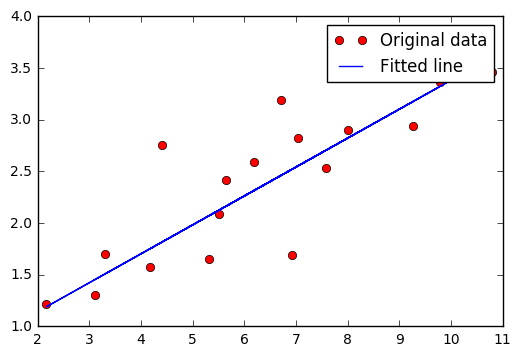

In [8]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    